# Example

Example taken from the internet.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [8]:
#
# Convert a dataframe to something that can be plotted.
#
def plottable_3d_info(df: pd.DataFrame):
    """
    Transform Pandas data into a format that's compatible with
    Matplotlib's surface and wireframe plotting.
    """
    index = df.index
    columns = df.columns

    x, y = np.meshgrid(np.arange(len(columns)), np.arange(len(index)))
    z = np.array([[df[c][i] for c in columns] for i in index])
    
    xticks = dict(ticks=np.arange(len(columns)), labels=columns)
    yticks = dict(ticks=np.arange(len(index)), labels=index)
    
    return x, y, z, xticks, yticks


In [9]:
#
# Compose a data frame to be ploted
#
the_data = pd.DataFrame(
    data=[
        [11.0, 1.20, 4.20, 0.90],
        [11.43, 1.31, 4.32, 0.95],
        [12.01, 1.45, 4.47, 1.11],
    ],
    index=['triangle', 'square', 'hexagon'],
    columns=['sodium', 'nylon 11', 'nylon 12', 'abs'],
)


In [10]:
the_data.head()

,sodium,nylon 11,nylon 12,abs
triangle,11.00,1.20,4.20,0.90
square,11.43,1.31,4.32,0.95
hexagon,12.01,1.45,4.47,1.11


In [11]:

### Transform to Matplotlib friendly format.
x, y, z, xticks, yticks = plottable_3d_info(the_data)


In [14]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

/var/folders/by/h44xtb5x3bbbxhhhgr5gk3hh0000gn/T/ipykernel_20410/2366647018.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = plt.figure().gca(projection='3d')


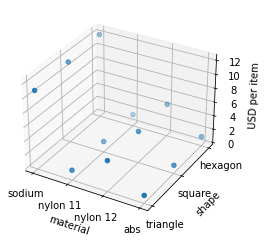

In [13]:

### Set up axes and put data on the surface.
axes = plt.figure().gca(projection='3d')
axes.scatter(x, y, z)

### Customize labels and ticks (only really necessary with
### non-numeric axes).
axes.set_xlabel('material')
axes.set_ylabel('shape')
axes.set_zlabel('USD per item')
axes.set_zlim3d(bottom=0)
plt.xticks(**xticks)
plt.yticks(**yticks)

plt.show()